# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline


In [88]:
df = pd.read_csv("Classified Data")
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [89]:
print(df["TARGET CLASS"].value_counts()) 

1    500
0    500
Name: TARGET CLASS, dtype: int64


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [90]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [91]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [92]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [147]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.20, random_state=101)

In [148]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [149]:
print(y_test)

545    0
298    0
109    0
837    0
194    0
      ..
68     1
449    0
715    1
793    0
688    1
Name: TARGET CLASS, Length: 200, dtype: int64


In [150]:
pred = knn.predict(X_test)
pred
metrics.accuracy_score(y_test, pred)

0.91

### Evaluation of classification quality using Confusion Matrix


In [151]:
confusion_matrix(y_test,pred)

array([[95, 11],
       [ 7, 87]], dtype=int64)

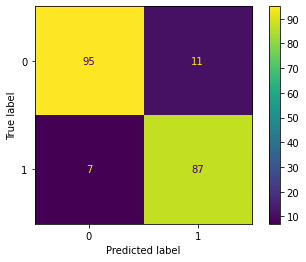

In [152]:
matrix=plot_confusion_matrix(knn, X_test,y_test)



***Print Misclassification error rate***

In [153]:
tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)

acc = ((tp+tn)/(tp+tn+fp+fn))
m_error= 1-acc
print(m_error)


0.08999999999999997


# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

In [154]:
#Taking odd values of K to prevent a tie
k_range = [i for i in  range(1,30,2)]
k_scores = []
k_errors = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors= k)
  scores = cross_val_score(knn, X_train, y_train , cv = 5, scoring= 'accuracy')
  k_scores.append(scores.mean()) 
  k_errors.append(1-scores.mean()) 

In [155]:
k_scores

[0.8975000000000002,
 0.9299999999999999,
 0.9299999999999999,
 0.9337500000000001,
 0.93,
 0.93125,
 0.9337500000000001,
 0.92875,
 0.93,
 0.9299999999999999,
 0.9337500000000001,
 0.93875,
 0.9387500000000001,
 0.9337500000000001,
 0.9375]

In [156]:
k_errors

[0.10249999999999981,
 0.07000000000000006,
 0.07000000000000006,
 0.06624999999999992,
 0.06999999999999995,
 0.06874999999999998,
 0.06624999999999992,
 0.07125000000000004,
 0.06999999999999995,
 0.07000000000000006,
 0.06624999999999992,
 0.06125000000000003,
 0.061249999999999916,
 0.06624999999999992,
 0.0625]

In [162]:
print('Length of list', len(k_scores))
print('Max acc', max(k_scores))
print('Min error', min(k_errors))

Length of list 15
Max acc 0.9387500000000001
Min error 0.061249999999999916


In [164]:
optimal_k=k_range[k_errors.index(min(k_errors))]
optimal_k

25

In [165]:
#The optimum K value is 25 in this case

Text(0, 0.5, 'error')

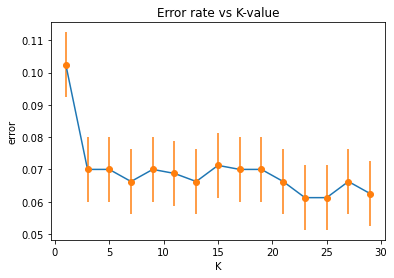

In [167]:
plt.plot(k_range,k_errors)
plt.errorbar(k_range, k_errors,
             yerr = 0.01,
             fmt ='o')
plt.title("Error rate vs K-value" )
plt.xlabel("K")
plt.ylabel("error")

In [179]:
#Predicting on test data
td = KNeighborsClassifier(n_neighbors=25)
td.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [181]:
predicting = td.predict(X_test)
np.mean(predicting != y_test)

0.05